# Addition

In [1]:
import sys
## To get helper functions from another folder
# sys.path.insert(0, '../') # if _helper_basics_ is in previous folder
now_i_am_at = 'home' # home dso test
if now_i_am_at=='home': sys.path.insert(0, 'E:/Leonard HDD/Dropbox/DSO/Tasks/')
elif now_i_am_at=='dso': sys.path.insert(0, 'D:/Dropbox/DSO/Tasks')

from _helper_basics_ import *

%matplotlib inline
plt.rcParams['savefig.dpi'] = 100

%load_ext autoreload
%autoreload 2

print('keras', keras.__version__)
print('tensorflow', tf.__version__)

Using TensorFlow backend.


keras 2.0.6
tensorflow 1.2.1


In [12]:
from _helper_basics_ import *
%reload_ext autoreload

In [30]:
Archi_dir = ""
Weights_path = "Logs/"
if not os.path.exists(Weights_path): os.mkdir(Weights_path)
Ckpt_Mod_Weights_fold = Archi_dir+"Checkpoint_Model_Weights/"
if not os.path.exists(Ckpt_Mod_Weights_fold): os.mkdir(Ckpt_Mod_Weights_fold)

# Load Training Data

In [12]:
X_train_removed = pickle.load( open('X_train_removed', 'rb'))
Y_train_removed = pickle.load( open('Y_train_removed', 'rb'))

In [14]:
print('X_train_removed.shape',X_train_removed.shape)
print('Y_train_removed.shape',Y_train_removed.shape)

X_train_removed.shape (64144, 2)
Y_train_removed.shape (64144, 201)


# Setup & Training

In [150]:
from _helper_basics_ import *
%reload_ext autoreload

In [16]:
def build_model():
    ######################### Build Architecture  ##########################
    ## Input
    Inp = Input( shape=(2,), name='Input' ) 

    x = Dense(100, activation='sigmoid')(Inp)
    x = Dense(100, activation='sigmoid')(x)

    ## Output
    x = Dense(num_classes, activation='softmax', name='Output')(x)
    train_model = Model(Inp, x)
    return train_model
train_model = build_model()
########################### Printing information ###########################
train_model.summary()
# print_model_weights(train_model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
Output (Dense)               (None, 201)               20301     
Total params: 30,701
Trainable params: 30,701
Non-trainable params: 0
_________________________________________________________________


In [24]:
######################## Training Parameters ###############################
learning_rate = 1.
decay = 0;          	print('decay',decay)
training_epochs = 200;	print('training_epochs',training_epochs)
batch_size = 128;		print('batch_size',batch_size)
######################## Optimizer/Error/Metrics ###############################
sgd_mtm = SGD(lr=learning_rate, decay=decay, momentum=0.9, nesterov=True)
adam_opt = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=decay)
######################## Checkpoints ###############################
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-6, verbose=1)

decay 0
training_epochs 200
batch_size 128


learning_rate 0.001
Train on 64144 samples, validate on 25125 samples
Epoch 1/200
64144/64144 [==============================] - 23s - loss: 0.0530 - categorical_accuracy: 0.0079 - val_loss: 0.0524 - val_categorical_accuracy: 0.0098
Epoch 2/200
64144/64144 [==============================] - 21s - loss: 0.0473 - categorical_accuracy: 0.0200 - val_loss: 0.0437 - val_categorical_accuracy: 0.0252
Epoch 3/200
64144/64144 [==============================] - 21s - loss: 0.0414 - categorical_accuracy: 0.0418 - val_loss: 0.0396 - val_categorical_accuracy: 0.0624
Epoch 4/200
64144/64144 [==============================] - 22s - loss: 0.0377 - categorical_accuracy: 0.0697 - val_loss: 0.0362 - val_categorical_accuracy: 0.0738
Epoch 5/200
64144/64144 [==============================] - 23s - loss: 0.0348 - categorical_accuracy: 0.0907 - val_loss: 0.0337 - val_categorical_accuracy: 0.1222
Epoch 6/200
64144/64144 [==============================] - 22s - loss: 0.0325 - categorical_accuracy: 0.1178 - val_

64144/64144 [==============================] - 19s - loss: 0.0070 - categorical_accuracy: 0.9624 - val_loss: 0.0069 - val_categorical_accuracy: 0.9583
Epoch 97/200
64144/64144 [==============================] - 19s - loss: 0.0069 - categorical_accuracy: 0.9589 - val_loss: 0.0068 - val_categorical_accuracy: 0.9696
Epoch 98/200
64144/64144 [==============================] - 19s - loss: 0.0068 - categorical_accuracy: 0.9602 - val_loss: 0.0068 - val_categorical_accuracy: 0.9778
Epoch 99/200
64144/64144 [==============================] - 19s - loss: 0.0068 - categorical_accuracy: 0.9619 - val_loss: 0.0067 - val_categorical_accuracy: 0.9434 categorical_ac - ETA: 1s - - ETA: 0s - loss: 0.0068 - categorical_accuracy
Epoch 100/200
64144/64144 [==============================] - 20s - loss: 0.0067 - categorical_accuracy: 0.9611 - val_loss: 0.0067 - val_categorical_accuracy: 0.9426
Epoch 101/200
64144/64144 [==============================] - 19s - loss: 0.0067 - categorical_accuracy: 0.9626 - val_

64144/64144 [==============================] - 19s - loss: 0.0033 - categorical_accuracy: 0.9927 - val_loss: 0.0033 - val_categorical_accuracy: 0.9873
Epoch 190/200
64144/64144 [==============================] - 20s - loss: 0.0033 - categorical_accuracy: 0.9947 - val_loss: 0.0033 - val_categorical_accuracy: 0.9898
Epoch 191/200
64144/64144 [==============================] - 19s - loss: 0.0033 - categorical_accuracy: 0.9943 - val_loss: 0.0032 - val_categorical_accuracy: 1.0000
Epoch 192/200
64144/64144 [==============================] - 19s - loss: 0.0032 - categorical_accuracy: 0.9940 - val_loss: 0.0032 - val_categorical_accuracy: 1.0000
Epoch 193/200
64144/64144 [==============================] - 19s - loss: 0.0032 - categorical_accuracy: 0.9937 - val_loss: 0.0032 - val_categorical_accuracy: 0.9945
Epoch 194/200
64144/64144 [==============================] - 19s - loss: 0.0032 - categorical_accuracy: 0.9933 - val_loss: 0.0032 - val_categorical_accuracy: 0.9946
Epoch 195/200
64144/6414

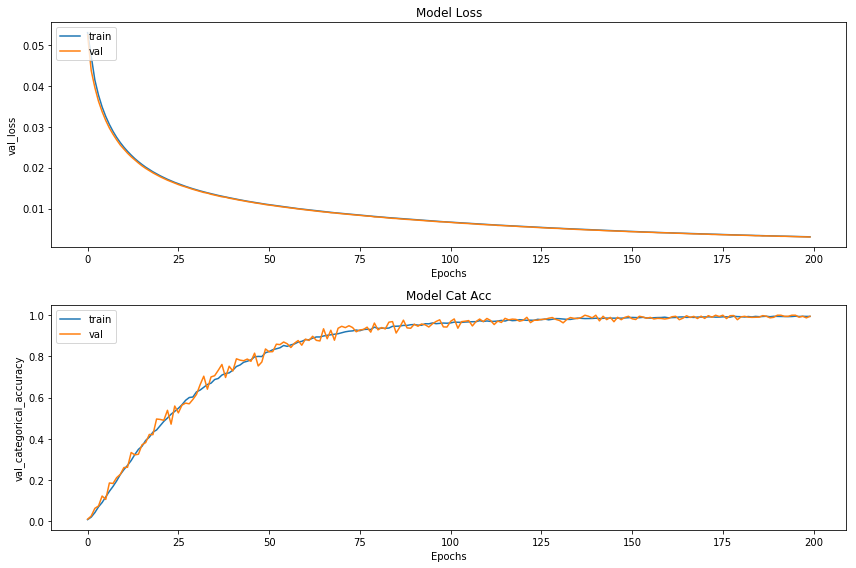

In [40]:
train_model_v1_1 = build_model()
learning_rate = 1e-3;	print('learning_rate',learning_rate)
adam_opt = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=decay)
train_model_v1_1.compile(loss=categorical_crossentropy ,optimizer=adam_opt, metrics=['categorical_accuracy'])
########################### Actual training ##################################
try :
    history_v1_1 = train_model_v1_1.fit(X_train_removed/100., Y_train_removed/100.,  # X_train, Y_train
                                        batch_size = batch_size, epochs = training_epochs, verbose = 1,
                                        validation_data=(X_val/100.,Y_val/100.), # None (X_val,Y_val)
                                        callbacks=[reduce_lr])
    plt.figure(figsize=(12,8));k=2;l=1
    plt.subplot(k,1,l); plot_loss(history_v1_1, ['loss', 'val_loss'], 'Model Loss', ['train','val'], show_plot=True); l+=1
    plt.subplot(k,1,l); plot_loss(history_v1_1, ['categorical_accuracy','val_categorical_accuracy'], 'Model Cat Acc', ['train','val'], show_plot=True); l+=1
except KeyboardInterrupt :
    print('\n\nKeyboardInterrupt !!!')

In [41]:
num_model = 1

## Save Model
model_path = Weights_path+"Dense_"+str(num_model)+"_model.json"

## Save Weights
weights_path = Weights_path+"Dense_"+str(num_model)+"_weights.h5"

save_model(train_model_v1_1, model_path, weights_path)

Saved model : Logs/Dense_1_model.json
Saved weights : Logs/Dense_1_weights.h5


# Prediction

In [59]:
print('X_train_50     ',X_train_50.shape)
print('Y_train_50     ',Y_train_50.shape)

Y_Pred_train_50 = train_model.predict(X_train_50/100.)
print('Y_Pred_train_50',Y_Pred_train_50.shape)

Y_Pred_val = train_model.predict(X_val/100.)
print('Y_Pred_val  ',Y_Pred_val.shape)

X_train_50      (64144, 2)
Y_train_50      (64144, 201)
Y_Pred_train_50 (64144, 201)
Y_Pred_val   (25125, 201)


In [60]:
idx = 2

print('X_train[idx]', X_train[idx])
print('np.argmax( Y_train[idx])', np.argmax( Y_train[idx]))
print('np.argmax( Y_Pred[idx])', np.argmax( Y_Pred_train_50[idx]))


print('\nX_val[idx]', X_val[idx])
print('np.argmax( Y_val[idx])', np.argmax( Y_val[idx]))
print('np.argmax( Y_Pred[idx])', np.argmax( Y_Pred_val[idx]))

X_train[idx] [ 11.  37.]
np.argmax( Y_train[idx]) 48
np.argmax( Y_Pred[idx]) 116

X_val[idx] [ 86.  33.]
np.argmax( Y_val[idx]) 119
np.argmax( Y_Pred[idx]) 119


In [34]:
count,count_correct,count_norm = 0,0,0
for idx in range(len(X_val)):
    x_val = X_val[idx]
    if x_val[0]==50 or x_val[1]==50:
        count_norm += np.linalg.norm(np.argmax( Y_val[idx])-np.argmax( Y_Pred_val[idx])) # Y_val[idx]-Y_Pred_val[idx]
#         print('X_val[idx]', x_val)
#         print('np.argmax( Y_val[idx])', np.argmax( Y_val[idx]))
#         print('np.argmax( Y_Pred[idx])', np.argmax( Y_Pred_val[idx]))
        if np.argmax( Y_val[idx]) == np.argmax( Y_Pred_val[idx]) :
            count_correct += 1
        count += 1
#         break
print('Norm =',count_norm/count)
print('Correct =',count_correct,'/',count, '(',100*count_correct/count,')')

Norm = 0.450424929178
Correct = 198 / 353 ( 56.09065155807365 )
